<h2>Análise das taxas de homicídios em nível mundial</h2>

<h3>Análise do conjunto de dados de taxas de homicídios em nível mundial e outras variáveis sócio econômicas para tentar entender porque alguns países são mais violentos que outros</h3>

In [2]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
#Carga e visualização das primeiras cinco primeiras observações do conjunto de dados

tx_hom = pd.read_excel("Dados/ind_hom.xlsx")
tx_hom.head()

,pais,regiao,indice,ano
0,El Salvador,América Central e Caribe,52.02,2018
1,Jamaica,América Central e Caribe,43.85,2018
2,Lesotho,África,41.25,2015
3,Honduras,América Central e Caribe,38.93,2018
4,Belize,América Central e Caribe,37.90,2017


<h2>Conjunto de dados de Taxas de Homicídios </h2>

<h3> Índice -> Taxa de mortes a cada 100.000 habitantes </h3>

In [4]:
#Não preciso do ano em que foi medido a taxa de homicídio, de forma que vou retirar ele do data frame
tx_hom = tx_hom [["pais","regiao","indice"]]
tx_hom.head()

,pais,regiao,indice
0,El Salvador,América Central e Caribe,52.02
1,Jamaica,América Central e Caribe,43.85
2,Lesotho,África,41.25
3,Honduras,América Central e Caribe,38.93
4,Belize,América Central e Caribe,37.90


In [5]:
#Carga e visualização de dados socieconômicos
dados = pd.read_excel("Dados/dados.xlsx")
dados.head()

,pais,indice_dem,gini,idade_media,pib_pct
0,Norway,9.81,27.0,39.5,67988591
1,Iceland,9.37,26.8,37.1,57189031
2,Sweden,9.26,28.8,41.1,50339201
3,New Zealand,9.25,36.2,37.2,38675319
4,Canada,9.24,33.8,41.8,42080050


<h2>Conjunto de dados -> Dados Socioeconômicos</h2>

<h3>Índices:</h3>
<h3>a) Índice de democracia medido pela Revista The Economist. Dúvida: Países ditatoriais (ou seja, com menor nota no índice de democracia) e que controlam mais a população, são mais seguros?)</h3>
<h3>b) Índice de Gini. Dúvida: Países menos desiguais (ou seja, com menor índice de gini) são mais seguros?</h3>
<h3>b) Idade média da população. Dúvida: Países com maior populações mais velhas são mais seguros?</h3>
<h3>c) PIB per capita. Dúvida: Países mais ricos são mais seguros?</h3>

In [6]:
#Vamos fundir os índices de homicídio com os dados socioeconômicos
df_total = tx_hom.merge(dados)
df_total.head(10)

,pais,regiao,indice,indice_dem,gini,idade_media,pib_pct
0,El Salvador,América Central e Caribe,52.02,5.90,38.6,27.7,3821286
1,Jamaica,América Central e Caribe,43.85,7.13,45.5,29.4,5220808
2,Lesotho,África,41.25,6.30,44.9,24.7,924208
3,Honduras,América Central e Caribe,38.93,5.36,52.1,24.4,2412435
4,Venezuela,América do Sul,36.69,2.76,46.9,30.0,1739112
5,South Africa,África,36.40,7.05,63.0,28.0,4735747
6,Trinidad and Tobago,América Central e Caribe,30.88,7.16,40.3,37.8,16197204
7,Mexico,América Central e Caribe,29.07,6.07,45.4,29.3,8069104
8,Brazil,América do Sul,27.38,6.92,53.9,33.2,6450451
9,Colombia,América do Sul,25.34,7.04,50.4,31.2,5207238


In [7]:
#Inicialmente vamos entender como está a classificação de cada coluna do nosso banco de dados
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pais         147 non-null    object 
 1   regiao       147 non-null    object 
 2   indice       147 non-null    float64
 3   indice_dem   147 non-null    float64
 4   gini         147 non-null    float64
 5   idade_media  147 non-null    float64
 6   pib_pct      147 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 9.2+ KB


In [8]:
#Poderíamos deixar o pib_pct como inteiro, mas para fins de exercício, vamos transformá-lo em float
df_total["pib_pct"] = df_total["pib_pct"].astype("float64")
df_total.info()
df_total.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pais         147 non-null    object 
 1   regiao       147 non-null    object 
 2   indice       147 non-null    float64
 3   indice_dem   147 non-null    float64
 4   gini         147 non-null    float64
 5   idade_media  147 non-null    float64
 6   pib_pct      147 non-null    float64
dtypes: float64(5), object(2)
memory usage: 9.2+ KB


,pais,regiao,indice,indice_dem,gini,idade_media,pib_pct
0,El Salvador,América Central e Caribe,52.02,5.90,38.6,27.7,3821286.0
1,Jamaica,América Central e Caribe,43.85,7.13,45.5,29.4,5220808.0
2,Lesotho,África,41.25,6.30,44.9,24.7,924208.0
3,Honduras,América Central e Caribe,38.93,5.36,52.1,24.4,2412435.0
4,Venezuela,América do Sul,36.69,2.76,46.9,30.0,1739112.0


In [9]:
#Vamos dividir a renda per capita para facilitar a visualização
df_total["pib_pct"]=df_total["pib_pct"]/1000000
df_total.head()

,pais,regiao,indice,indice_dem,gini,idade_media,pib_pct
0,El Salvador,América Central e Caribe,52.02,5.90,38.6,27.7,3.821286
1,Jamaica,América Central e Caribe,43.85,7.13,45.5,29.4,5.220808
2,Lesotho,África,41.25,6.30,44.9,24.7,0.924208
3,Honduras,América Central e Caribe,38.93,5.36,52.1,24.4,2.412435
4,Venezuela,América do Sul,36.69,2.76,46.9,30.0,1.739112


In [10]:
#Ficou estranho a renda per capita, né? Vamos arredondar 
df_total.round(2)
df_total.head()

,pais,regiao,indice,indice_dem,gini,idade_media,pib_pct
0,El Salvador,América Central e Caribe,52.02,5.90,38.6,27.7,3.821286
1,Jamaica,América Central e Caribe,43.85,7.13,45.5,29.4,5.220808
2,Lesotho,África,41.25,6.30,44.9,24.7,0.924208
3,Honduras,América Central e Caribe,38.93,5.36,52.1,24.4,2.412435
4,Venezuela,América do Sul,36.69,2.76,46.9,30.0,1.739112


Como é possível ver pelo describe, temos 147 países com dados como:
1. A região de onde eles são
2. O índice de homicídios
3. O índice de democracia
4. O índice de Gini
5. A idade média da população
6. O PIB per capita

In [11]:
#Qual seria o país mais violento?
df_total.head(1)

,pais,regiao,indice,indice_dem,gini,idade_media,pib_pct
0,El Salvador,América Central e Caribe,52.02,5.9,38.6,27.7,3.821286


In [12]:
#E o Brasil? Como nós estamos nesse ponto?

df_total[df_total["pais"] == "Brazil"]

,pais,regiao,indice,indice_dem,gini,idade_media,pib_pct
8,Brazil,América do Sul,27.38,6.92,53.9,33.2,6.450451


In [13]:
#Vamos primeiramente analisar os dados de cada uma das colunas
df_total.describe()

,indice,indice_dem,gini,idade_media,pib_pct
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,6.355850,5.618571,38.535374,30.987075,14.145158
std,9.228808,2.147210,7.956111,9.209028,19.878740
min,0.160000,1.320000,24.200000,14.800000,0.263674
25%,1.290000,3.620000,32.800000,23.600000,1.811724
50%,2.510000,5.900000,37.300000,30.100000,4.735747
75%,7.375000,7.185000,43.700000,39.250000,16.713670
max,52.020000,9.810000,63.000000,48.600000,109.602322


Como é possível perceber pela seção "count" temos 147 países

A média dos índices de homicídios são de 6,35 mortes a cada 100 habitantes
Como podemos perceber pela seção "max" (máximo) o país mais violento possui uma taxa de 52,02 mortes a cada 100.000 habitantes, apenas o dobro que a taxa brasileira como vimos no começo da aula

In [14]:
#E o menos?
df_total.tail(1)

,pais,regiao,indice,indice_dem,gini,idade_media,pib_pct
146,Singapore,Ásia,0.16,6.03,46.4,35.6,58.483961


In [15]:
#Vamos checar qual a média da taxa de homicídios por continente 
media_tx = df_total["indice"].groupby(by=df_total.regiao).mean()
media_tx.sort_values(ascending=False,inplace=True)
media_tx                            

regiao
América Central e Caribe     23.818182
América do Sul               13.156667
África                        7.795682
Oceania                       2.925000
Ásia                          2.376486
Europa e América do Norte     1.840769
Name: indice, dtype: float64

<AxesSubplot:title={'center':'Taxa média de homicídios por região do planeta'}, ylabel='regiao'>

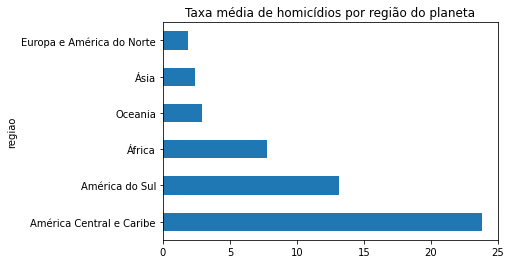

In [16]:
#Vamos visualizar por meio de um gráfico de barrras

media_tx.plot(
    kind="barh",
    title="Taxa média de homicídios por região do planeta")

<AxesSubplot:title={'center':'Taxa média de homicídios por região do planeta'}, ylabel='regiao'>

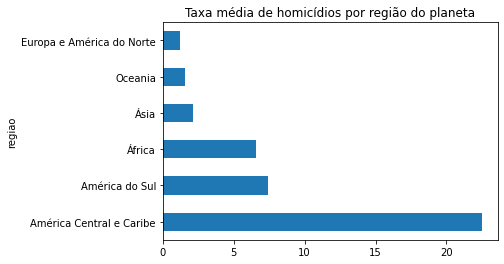

In [17]:
#Ah professor, podemos fazer isso por mediana também? Claro

mediana_tx = df_total["indice"].groupby(by=df_total.regiao).median()
mediana_tx.sort_values(ascending=False,inplace=True)
mediana_tx.plot(
    kind="barh",
    title="Taxa média de homicídios por região do planeta")

In [18]:
#Por curiosidade, quais são os países mais ricos?
df_total=df_total.sort_values(by=["pib_pct"],ascending=False)
df_total.head()

,pais,regiao,indice,indice_dem,gini,idade_media,pib_pct
144,Luxembourg,Europa e América do Norte,0.30,8.68,34.9,39.5,109.602322
135,Switzerland,Europa e América do Norte,0.59,8.83,32.7,42.7,81.867462
127,Ireland,Europa e América do Norte,0.87,9.05,32.8,37.8,79.668502
141,Norway,Europa e América do Norte,0.47,9.81,27.0,39.5,67.988591
56,United States,Europa e América do Norte,4.96,7.92,41.4,38.5,63.051398


In [19]:
#E os mais pobres?
df_total.tail()

,pais,regiao,indice,indice_dem,gini,idade_media,pib_pct
34,Madagascar,África,7.69,5.70,42.6,20.3,0.514854
11,Central African Republic,África,19.76,1.32,56.2,20.0,0.480490
65,Mozambique,África,3.40,3.51,54.0,17.0,0.455014
93,Malawi,África,1.73,5.74,44.7,16.8,0.399097
49,Burundi,África,6.02,2.14,38.6,17.7,0.263674


In [20]:
#E os mais desiguais?
df_total=df_total.sort_values(by=["gini"],ascending=False)
df_total.head()

,pais,regiao,indice,indice_dem,gini,idade_media,pib_pct
5,South Africa,África,36.40,7.05,63.0,28.0,4.735747
12,Namibia,África,17.14,6.52,59.1,21.8,4.051930
51,Suriname,América do Sul,5.50,6.82,57.6,31.0,4.199155
53,Zambia,África,5.30,4.86,57.1,16.9,1.001440
11,Central African Republic,África,19.76,1.32,56.2,20.0,0.480490


In [21]:
#E os menos?
df_total.tail()

,pais,regiao,indice,indice_dem,gini,idade_media,pib_pct
47,Ukraine,Europa e América do Norte,6.20,5.81,26.1,41.2,3.424769
64,Moldova,Europa e América do Norte,4.10,5.78,25.7,37.7,4.267726
104,Slovakia,Europa e América do Norte,1.37,6.97,25.2,41.8,18.669295
78,Belarus,Europa e América do Norte,2.39,2.59,25.2,40.9,6.133880
140,Slovenia,Europa e América do Norte,0.48,7.54,24.2,44.9,25.038792


In [22]:
#E os mais velhos?
df_total=df_total.sort_values(by=["idade_media"],ascending=False)
df_total.head()

,pais,regiao,indice,indice_dem,gini,idade_media,pib_pct
145,Japan,Ásia,0.26,8.13,32.9,48.6,39.047860
123,Germany,Europa e América do Norte,0.95,8.67,31.9,47.8,45.466116
137,Italy,Europa e América do Norte,0.57,7.74,35.9,46.5,30.657296
131,Hong Kong,Ásia,0.65,5.57,53.9,45.6,45.175727
124,Greece,Europa e América do Norte,0.94,7.39,34.4,45.3,18.168338


In [23]:
#E os mais jovens?
df_total.tail()

,pais,regiao,indice,indice_dem,gini,idade_media,pib_pct
26,Chad,África,9.04,1.55,43.3,16.1,0.639847
17,Mali,África,10.90,3.93,33.0,16.0,0.899223
58,Angola,África,4.85,3.66,51.3,15.9,2.021310
18,Uganda,África,10.42,4.94,42.8,15.7,0.915354
60,Niger,África,4.44,3.29,34.3,14.8,0.535831


<h2>Calculando outliers</h2>

Antes de qualquer análise estatística é importante checarmos se devemos retirar ou não os outliers

"Um outlier é uma observação que se diferencia tanto das demais observações que levanta suspeitas de que aquela observação foi gerada por um mecanismo distinto, em outras palavras os outliers são dados que se distanciam radicalmente de todos os outros São pontos fora da curva normal, valores que fogem da normalidade e que podem causar desequilíbrio nos resultados obtidos. Um conjunto de dados pode apresentar um ou vários outliers. O efeito de um outlier é quase um efeito borboleta, um pequeno erro se propaga e quando não tratado corretamente pode ocasionar problemas e anomalias. Em análises estatísticas o efeito do outlier pode ser facilmente observado." Fonte: Wikipedia


Nesta seção vamos aprender o método baseado na amplitude interquartil.

Vamos usar a sigla IQR para nos referenciar à amplitude interquartil

Ela é a diferença entre os Quartis 1 e 3 do conjunto de dados.

Para calcular os outliers, calculamos o limite dos outliers superiores e inferiores

Quem estiver acima ou abaixo desse limite é considerado outlier

Out_sup = Média  + 1,5 x IQR

Out_inf = Média  - 1,5 x IQR

In [24]:
#Precisamos primeiro calcular os primeiros, terceiros quartis e a média
q1_hom = df_total['indice'].quantile(0.25)
q3_hom = df_total['indice'].quantile(0.75)
mean_hom = df_total["indice"].mean()
print(q1_hom)
print(q3_hom)
print(mean_hom)

1.29
7.375
6.355850340136053


In [25]:
#E agora calculamos o intervalo interquartil
IQR = q3_hom - q1_hom
IQR

6.085

In [26]:
#Vamos calcular agora os outliers superiores e inferiores
Out_sup = mean_hom +1.5*IQR
Out_inf = mean_hom -1.5*IQR
print(Out_sup)
print(Out_inf)

15.483350340136052
-2.7716496598639466


Ou seja, países que possuem taxa de homicídio acima de 15,48 são outliers superiores

Países que possuem taxa de homicídio abaixo de -2,77 são outliers inferiores

Vamos checar quais países são Outliers Superiores


In [27]:
paises_out = df_total.loc [(df_total["indice"]>15.48)]
paises_out=paises_out.sort_values(by=["indice"],ascending=False)
paises_out

,pais,regiao,indice,indice_dem,gini,idade_media,pib_pct
0,El Salvador,América Central e Caribe,52.02,5.90,38.6,27.7,3.821286
1,Jamaica,América Central e Caribe,43.85,7.13,45.5,29.4,5.220808
2,Lesotho,África,41.25,6.30,44.9,24.7,0.924208
3,Honduras,América Central e Caribe,38.93,5.36,52.1,24.4,2.412435
4,Venezuela,América do Sul,36.69,2.76,46.9,30.0,1.739112
5,South Africa,África,36.40,7.05,63.0,28.0,4.735747
6,Trinidad and Tobago,América Central e Caribe,30.88,7.16,40.3,37.8,16.197204
7,Mexico,América Central e Caribe,29.07,6.07,45.4,29.3,8.069104
8,Brazil,América do Sul,27.38,6.92,53.9,33.2,6.450451
9,Colombia,América do Sul,25.34,7.04,50.4,31.2,5.207238


É chegado o momento em que você deve decidir se retira os oultliers ou não de sua pesquisa. 

Geralmente retiramos outliers quando os valores são *realmente* fora da realidade ou claramente temos valores que parecem ter sido preenchidos errados

No nosso data frame fica claro que ambas situações não se encontram presentes

E, bem, se retirássemos os outliers iríamos, nada mais nada menos, retirar o Brasil da pesquisa

Devido a isso, decidi manter os outliers na minha pesquisa

In [28]:
#Se hipoteticamente eu decidisse retirar os outliers, como deveria fazer?

paises_sem_out = df_total.loc[(df_total["indice"]<15.48)]
paises_sem_out=paises_sem_out.sort_values(by=["indice"],ascending=False)
paises_sem_out.head()

,pais,regiao,indice,indice_dem,gini,idade_media,pib_pct
13,Botswana,África,15.04,7.62,53.3,25.7,6.557505
14,Guyana,América do Sul,14.25,6.01,44.6,27.5,8.648546
15,Uruguay,América do Sul,12.06,8.61,39.7,35.5,15.331717
16,Costa Rica,América Central e Caribe,11.26,8.16,48.0,32.6,11.629012
17,Mali,África,10.90,3.93,33.0,16.0,0.899223


Mas vamos ao que realmente importa

Vamos analisar as correlações e checar quais correlações realmente influenciam as taxas de homicídio de um país

"Em probabilidade e estatística, correlação, dependência ou associação é qualquer relação estatística (causal ou não causal) entre duas variáveis e correlação é qualquer relação dentro de uma ampla classe de relações estatísticas que envolva dependência entre duas variáveis.Por exemplo, a correlação entre a estatura dos pais e a estatura dos pais e dos filhos". Fonte: Wikipedia


In [29]:
#Portanto vamos calcular a correlação
corr = df_total.corr()
corr

,indice,indice_dem,gini,idade_media,pib_pct
indice,1.000000,-0.046941,0.459792,-0.262597,-0.276760
indice_dem,-0.046941,1.000000,-0.176954,0.607636,0.612004
gini,0.459792,-0.176954,1.000000,-0.455820,-0.310255
idade_media,-0.262597,0.607636,-0.455820,1.000000,0.607831
pib_pct,-0.276760,0.612004,-0.310255,0.607831,1.000000


Ainda que a idade média e a riqueza dos países tenha alguma correlação (quanto mais velho e mais rico, menos violento é o país) a maior correlação é a
da concentração de renda. Quanto maior o gini, pior a distribuição de renda do país. Quanto maior o gini, maior o índice de homicídios do país

Isso quer dizer que necessariamente esse é o principal motivo que faz países serem violentos? Não, há um mantra na estatística que diz que correlação não quer dizer casualidade como é possível ver nos gráficos abaixo:

![](corr1.png)

![](corr2.png)

![](corr3.jpg)

A correlação é simplesmente um relacionamento, por exemplo a ação A está relacionada à ação B – mas um evento não necessariamente faz com que o outro evento aconteça.

No final, como tudo em uma pesquisa, a correlação é uma pista para onde devemos seguir

<AxesSubplot:>

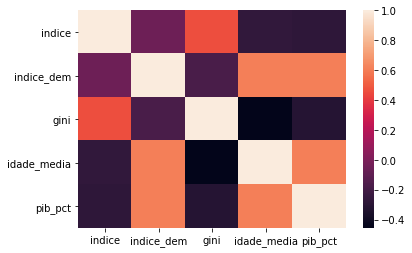

In [33]:
#Podemos fazer um gráfico para ficar mais fácil a visualização
sns.heatmap(corr)


<AxesSubplot:>

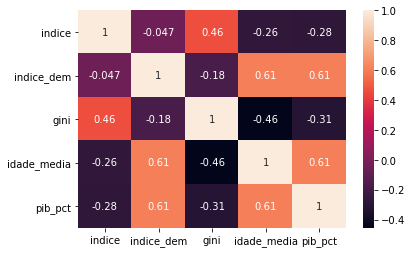

In [34]:
#E podemos fazer várias customizações

sns.heatmap(corr, annot=True, annot_kws={"size": 10})

<AxesSubplot:>

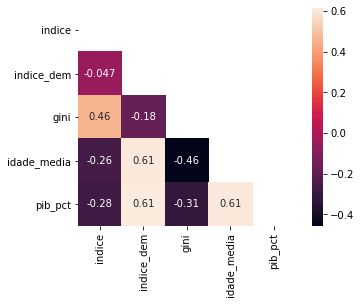

In [35]:
#Eu gosto sempre de utilizar esse gráfico, acho ele mais limpo e direto ao ponto

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, square=True,annot=True, annot_kws={"size": 10})

Para outros exemplos de gráficos de correlações a diversos outros e outros e outros sempre acesse esse site aqui:

https://www.python-graph-gallery.com/

Text(0.5, 0, 'Índice de gini')

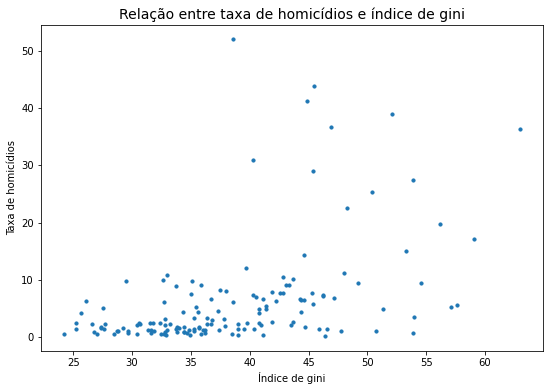

In [41]:
plt.figure(figsize=(9,6))

plt.scatter(df_total.gini, df_total.indice, s=10)

plt.title('Relação entre taxa de homicídios e índice de gini', fontsize=14)
plt.ylabel('Taxa de homicídios')
plt.xlabel('Índice de gini')

![](fish.png)